Thuật ngữ:

* phương pháp kết hợp: ensemble
* bỏ túi: bagging
* lấy mẫu tái lặp: boostrapping
* phương pháp tăng cường: boosting.
* phân loại nhị phân: binary classification
* mô hình gốc cây: stump

# 1. Phương pháp tăng cường (_Boosting_)

Ở bài trước chúng ta đã được học về mô hình [random forest](https://phamdinhkhanh.github.io/deepai-book/ch_ml/index_RandomForest.html). Đây là lớp mô hình dựa trên hai kĩ thuật chính là _phương pháp kết hợp_ (_ensemble learning_) và _bỏ túi_ (_bagging_). Trong đó _phương pháp kết hợp_ là kĩ thuật sử dụng nhiều mô hình yếu phối hợp với nhau để tạo thành một mô hình dự báo mạnh hơn; _bỏ túi_ là phương pháp huấn luyện các mô hình trên những bộ dữ liệu được _lấy mẫu tái lặp_ (_boostrapping_) từ tập dữ liệu đầu vào.

Như vậy mô hình _rừng cây_ là kết hợp của nhiều _cây quyết định_ $\hat{f}^1, \hat{f}^2, \dots, \hat{f}^p$. Những cây quyết định này được huấn luyện trên các tập dữ liệu khác nhau là $\mathcal{B}_1, \mathcal{B}_2, \dots, \mathcal{B}_p$ được _lấy mẫu tái lặp_ từ tập huấn luyện $\mathcal{D}$. Kết hợp kết quả dự báo từ nhiều cây quyết định chúng ta sẽ thu được dự báo cho từng quan sát. Một điểm đáng lưu ý là trong mô hình _rừng cây_ thì những _cây quyết định_ là hoàn toàn độc lập.

Trong bài này chúng ta cùng tìm hiểu về phương pháp (_tăng cường_) _boosting_, đây cũng là một phương pháp kết hợp các _cây quyết định_ nhưng giữa các _cây quyết định_ không hoàn toàn độc lập mà chúng có sự phụ thuộc theo chuỗi. Tức là một _cây quyết định_ được phát triển từ việc sử dụng thông tin được dự báo từ những _cây quyết định_ được huấn luyện trước đó. Trong phương pháp _tăng cường_ chúng ta không sử dụng _lấy mẫu tái lặp_ để tạo dữ liệu huấn luyện mà các mô hình được huấn luyện ngay trên dữ liệu gốc. Giống như _phương pháp kết hợp_, kết quả dự báo của mô hình là sự kết hợp của những cây quyết định con.

Có nhiều thuật toán phân loại khác nhau được phát triển dựa trên _phương pháp tăng cường_. Trong đó _AdaBoost_ là thuật toán đầu tiên được áp dụng trong bài toán _phân loại nhị phân_. Chính vì vậy, đây chính là thuật toán điển hình nhất mà chúng ta nên bắt đầu khi tiếp cận _phương pháp tăng cường_. Ngoài ra còn một số thuật toán hiện đại khác được xây dựng dựa trên _AdaBoost_, trong đó nổi bật nhất là _Gradient Boosting_. Trước tiên chúng ta sẽ cùng tìm hiểu về _AdaBoost_ theo nội dung bên dưới.


# 2. AdaBoosting

Giả định rằng bài toán _phân loại nhị phân_ với biến mục tiêu gồm hai nhãn $y \in \{-1, 1\}$. Giả định theo _phương pháp tăng cường_ thì hàm dự báo đối với một biến đầu vào $\mathbf{x}_i$ là $\hat{f}(\mathbf{x_i}) \in \{-1, 1 \}$. Đồng thời biến mục tiêu $\mathbf{y}$ nhận một trong hai giá trị $\{-1, 1\}$. Khi đó sai số trên tập huấn luyện là:

$$r = \frac{1}{N}\sum_{i=1}^{N} \mathbf{1}(y_i \neq \hat{f}(\mathbf{x}_i))$$

Trong đó hàm $\mathbf{1}(.)$ là một hàm logic nhận giá trị 1 nếu như điều kiện bên trong hàm trả về là đúng, trái lại thì nhận giá trị 0.

Một _mô hình phân loại yếu_ (_weak classifier_) có tỷ lệ dự báo sai lớn và giả định nó chỉ tốt hơn so với phân loại ngẫu nhiên một chút. Mục tiêu của _phương pháp tăng cường_ là áp dụng liên tiếp các _mô hình phân loại yếu_ để điều chỉnh lại trọng số cho các quan sát, qua đó ở mô hình sau sẽ ưu tiên phân loại đúng những quan sát đã phân loại sai từ mô hình trước đó. Kết thúc ta thu được một mô hình dự báo được kết hợp từ các mô hình phân loại yếu trong chuỗi. Mô hình kết hợp này thường có hiệu suất cao.

![](https://imgur.com/KjfD7mj.png)

**Hình 1:** Sơ đồ của mô hình _AdaBoosting_. Mỗi một mô hình con được huấn luyện từ bộ dữ liệu được đánh trọng số theo tính toán từ mô hình tiền nhiệm. Dữ liệu có trọng số sau đó được đưa vào huấn luyện mô hình tiếp theo. Đồng thời ta cũng tính ra một _trọng số quyết định_ $\alpha_p$ thể hiện vai trò của mỗi mô hình ở từng bước huấn luyện. Cứ tiếp tục như vậy cho tới khi số lượng mô hình đạt ngưỡng hoặc tập huấn luyện hoàn toàn được phân loại đúng thì dừng quá trình.



Kết quả dự báo từ mô hình cuối cùng là một kết hợp từ những mô hình với trọng số $\alpha_i$:

$$\hat{f}(\mathbf{x}) = \text{sign} (\sum_{i=1}^{p} \alpha_i \hat{f}^{i}(\mathbf{x}))$$

Trong phương trình trên hàm $\text{sign}(x)$ là hàm nhận giá trị $-1$ nếu dấu của $x$ là dương và nhận giá trị $-1$ nếu ngược lại.

Các hệ số $\alpha_i$ được tính từ _phương pháp tăng cường_, chúng được sử dụng để đánh trọng số mức độ đóng góp từ mỗi một mô hình con $\hat{f}^{i}$ trong chuỗi nhằm phân bổ vai trò quyết định trên từng mô hình khác nhau tuỳ thuộc vào mức độ chính xác của chúng. Điều này được phân tích kĩ hơn bên dưới.

Khi huấn luyện một mô hình con $\hat{f}^{i}$ thì chúng ta áp dụng một trọng số $w_j$ lên từng quan sát $(\mathbf{x}_j, y_j)$ sao cho đối với những quan sát bị dự báo sai thì trọng số của nó sẽ lớn hơn. Như vậy ở mô hình tiếp theo sẽ ưu tiên dự báo đúng những quan sát này hơn so với những quan sát đã được dự báo đúng. Ở thời điểm khởi đầu thì chúng ta gán $w_j = \frac{1}{N}, ~~ \forall i = \overline{1, N}$.


## 2.1. Các bước của thuật toán AdaBoosting

1. Khởi tạo trọng số quan sát $w_i = \frac{1}{N}, \forall i = \overline{1, N}$.

2. Lặp lại quá trình huấn luyện chuỗi mô hình ở mỗi bước $b$, $b = 1,2, \dots, B$ gồm các bước con:

  a. Khớp mô hình $\hat{f}^{b}$ cho tập huấn luyện sử dụng trọng số $w_i$ cho mỗi quan sát $(\mathbf{x}_i, y_i)$.

  b. Tính sai số huấn luyện:

  $$r_b = \frac{\sum_{i=1}^{N} w_i \mathbf{1}(y_i \neq \hat{f}^{b}(\mathbf{x}_i))}{\sum_{i=1}^{N} w_i}$$

  Ở đây $\mathbf{1}(y_i \neq \hat{f}^{b}(\mathbf{x}_i))$ chính là những quan sát bị dự báo sai ở mô hình thứ $b$. Giá trị $r_b \in [0, 1]$.

  c. Tính trọng số quyết định cho từng mô hình:

  $$\alpha_b = \log(\frac{(1-r_b)}{r_b})$$

  d. Cập nhật trọng số cho từng quan sát: 
  $$ w_i := w_i \exp[\alpha_b \mathbf{1}(y_i \neq \hat{f}^{b}(\mathbf{x}_i))] $$
  với $\forall i = \overline{1, N}$. Như vậy ta có thể nhận thấy rằng:

  $$
  \begin{split}
  w_i := \left\{
  \begin{matrix}
  w_i &\text{ if } y_i = \hat{f}^{b}(\mathbf{x}_i) \\
  w_i \exp(\alpha_b) &\text{ if } y_i \neq \hat{f}^{b}(\mathbf{x}_i)
  \end{matrix}
  \right.\end{split}
  $$

  Sau khi tính xong các trọng số $w_i$ thì giá trị của chúng sẽ được chuẩn hoá  bằng cách chia cho tổng $\sum_{i=1}^{N} w_i$.
3. Cập nhật dự báo cuối cùng:

$$\hat{f}(\mathbf{x}) = \text{sign} (\sum_{i=1}^{p} \alpha_i \hat{f}^{i}(\mathbf{x})) \tag{1}$$


Trọng số $\alpha_i$ được tính ở bước thứ 2 thể hiện vai trò quan trọng trong việc ra quyết định của mô hình thứ $i$. Giá trị này được tính theo một hàm nghịch biến với sai số của mô hình. Chúng ta cùng phân tích hàm này bên dưới:

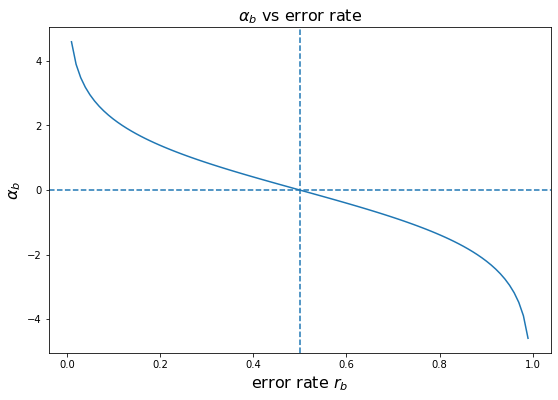

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
r = np.linspace(0.01, 0.99, 100)

def alpha(z):
  return np.log((1-z)/z)

y = alpha(r)
plt.plot(r, y)
plt.xlabel(r'error rate $r_b$', fontsize=16)
plt.ylabel(r'$\alpha_b$', fontsize=16)
plt.axvline(0.5, linestyle='--')
plt.axhline(0, linestyle='--')
plt.title(r'$\alpha_b$ vs error rate', fontsize=16)
plt.show()

**Hình 2:** Giá trị của _trọng số quyết định_ $\alpha_b$ theo sai số $r_b$. Đây là một hàm nghịch biến theo $r_b$ và có giá trị từ $(-\infty, + \infty)$ 

Bên dưới ta sẽ xét 3 trường hợp đối với sai số dự báo $r_b$:

* Khi $r_b = 0.5$ tương ứng với kết quả từ một mô hình dự báo ngẫu nhiên. Trường hợp này có $\alpha_b = 0$. Khi đó mô hình không có đóng góp gì vào hàm dự báo được thể hiện ở công thức $(1)$. Điều này là hợp lý vì một giá trị dự báo ngẫu nhiên thì không có ích cho việc phân loại. Đồng thời trọng số sau cập nhật $w_i \exp(\alpha_b) = w_i$, tức là vai trò của các quan sát được giữ cố định.

* Khi $r_b$ tiến dần tới $0$, chẳng hạn $r_b = 0.1$, tương ứng với mô hình dự báo có tỷ lệ sai số thấp và đây là một mô hình khá mạnh. Khi đó $\alpha_b = \log \frac{1-0.1}{0.1} = \log{9} = 2.197$ và $\exp(\alpha_b) = 9$. Như vậy đối với những quan sát bị dự báo sai thì trọng số của nó được gấp lên 9 lần, điều này giúp cho những mô hình sau sẽ điều chỉnh lại _cây quyết định_ sao cho tập trung vào dự báo đúng những quan sát này. Đồng thời $\alpha_b \hat{f}^{b}(\mathbf{x}) = 2.197~\hat{f}^{b}(\mathbf{x})$ cho thấy các dự báo từ mô hình này được đánh giá rất cao và góp phần gia tăng điểm số dự báo cuối cùng theo như công thức $(1)$.

* Khi $r_b$ tiến dần tới $1$, chẳng hạn $r_b = 0.9$ cho thấy đây là một mô hình rất yếu vì có tỷ lệ sai số dự báo cao. Khi đó $\alpha_b = \log \frac{1-0.9}{0.9} = \log \frac{1}{9} = -2.197$ là một giá trị âm tương đối nhỏ và $\exp(\alpha_b) = \frac{1}{9}$ là một giá trị gần 0. Như vậy trọng số $w_i \exp(\alpha_b)$ sẽ bị giảm gấp 9 lần so với $w_i$. Lưu ý rằng trong trường hợp này mô hình đang dự báo hầu hết là sai nên nếu mô hình dự báo sai thì dường như những quan sát đó lại dễ được dự báo đúng và ít quan trọng. Điều này cũng giống như một người dự báo sai tới 90% thì khả năng ta lấy kết quả ngược lại của anh ta sẽ được mô hình dự báo đúng 90% và những trường hợp anh ta dự báo sai thường dễ dàng được phân loại đúng nhờ làm ngược lại. Do đó ta cần giảm trọng số $w_i$ cho những quan sát mà mô hình dự báo sai, trong trường hợp này là giảm đi 9 lần. Đồng thời đóng góp từ kết quả dự báo vào mô hình là $\alpha_b \hat{f}^{b}(\mathbf{x}) = -2.197~\hat{f}^{b}(\mathbf{x})$ cho thấy kết quả từ mô hình này sẽ được cập nhật ngược chiều vào điểm số cuối cùng. Điều này cũng giống như chúng ta làm ngược lại gợi ý của một người hay phán đoán sai để thu được phán đoán đúng.

Quá trình _tăng cường_ mô hình sẽ tiếp tục như vậy cho đến khi mô hình đạt số lượng tối đa hoặc toàn bộ các quan sát trên tập kiểm tra được phân loại đúng. Một lưu ý đó là các mô hình _cây quyết định_ con trong phương pháp _tăng cường_ thường có độ sâu thấp, thông thường chỉ gồm 1 node gốc với hai node lá, trường hợp cây quyết định chỉ gồm một node gốc được gọi là mô hình _gốc cây_ (_stump_). Sở dĩ chúng ta không cần yêu cầu các _cây quyết định_ phải quá phức tạp là để ngăn ngừa hiện tượng _quá khớp_ có thể xảy ra và đồng thời tăng khả năng giải thích cho mô hình.

Bên dưới chúng ta sẽ thực hành huấn luyện mô hình _AdaBoosting_ trên _sklearn_.




## 2.2. Huấn luyện _AdaBoosting_ trên sklearn

Trên sklearn thực tế đang sử dụng phiên bản dự báo đa lớp đối với thuật toán _AdaBoost_, được gọi là _SAMME_(là viết tắt của _Stagewise Additive Modeling using a Multiclass Exponential loss function_). Khi chỉ có hai lớp, _SAMME_ tương đương với AdaBoost. Ngoài ra, để mô hình có thể ước lượng được xác suất của lớp (tức là có hàm _predict_proba()_), thì sklearn có thể sử dụng một biến thể của _SAMME_ được gọi là _SAMME.R_ (chữ R là viết tắt của với "Real"), dựa trên xác suất hơn là giá trị nhãn dự báo và nhìn chung chúng hoạt động tốt hơn. Đoạn mã sau giúp huấn luyện một mô hình AdaBoost dựa trên 200 mô hình _gốc cây_ (_stump_) bằng cách sử dụng class _AdaBoostClassifier_ của sklearn. Mô hình _gốc cây_ thì có max_depth = 1 hay nói cách khác, đây là cây quyết định bao gồm một node quyết định duy nhất cộng với với hai node lá. Đây cũng chính là cấu hình mặc định cho class _AdaBoostClassifier_: 

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load the dataset 
iris = load_iris()
X = iris.data
y = iris.target == 1

# Train/test split
idx = np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(idx)

idx_train = idx[:100]
idx_test = idx[100:]

X_train, y_train = X[idx_train, :], y[idx_train]
X_test, y_test = X[idx_test, :], y[idx_test]

# Train model
ada_clf = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=1), n_estimators=20,
  algorithm="SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

# Evaluate model on train and test
y_pred_train = ada_clf.predict(X_train)
print('accuracy on train: ', np.sum((y_pred_train==y_train))/len(y_train))

y_pred_test = ada_clf.predict(X_test)
print('accuracy on test: ', np.sum((y_pred_test==y_test))/len(y_test))

accuracy on train:  1.0
accuracy on test:  0.96


Như vậy kết quả của mô hình đạt độ chính xác trên tập huấn luyện là 100% và tập kiểm tra là 96%. Kết quả này cao hơn so với mô hình được huấn luyện từ thuật toán [rừng cây](https://phamdinhkhanh.github.io/deepai-book/ch_ml/RandomForest.html#huan-luyen-mo-hinh-rung-cay).

# 3. Gradient Boosting



Phương pháp _Gradient Boosting_ cũng có ý tưởng tương tự như _AdaBoosting_ đó là huấn luyện liên tiếp các mô hình yếu. Nhưng chúng ta không sử dụng sai số của mô hình để tính toán trọng số cho dữ liệu huấn luyện mà sử dụng phần dư. Xuất phát từ mô hình hiện tại, chúng ta cố gắng xây dựng một cây quyết định cố gắng khớp phần dư từ mô hình liền trước. Điểm đặc biệt của mô hình này đó là thay vì chúng ta cố gắng khớp giá trị biến mục tiêu là $\mathbf{y}$ thì chúng ta sẽ tìm cách khớp giá trị sai số của mô hình trước đó. Sau đó chúng ta sẽ đưa thêm mô hình huấn luyện vào hàm dự báo để cập nhật dần dần phần dư. Mỗi một cây quyết định trong chuỗi mô hình có kích thước rất nhỏ với chỉ một vài _nodes quyết định_ được xác định bởi tham số độ sâu $d$ trong mô hình. Hình bên dưới sẽ minh hoạ cụ thể hơn quá trình này:

![](https://imgur.com/YzvCJ6g.png)

**Hình 3:** Phương pháp huấn luyện mô hình theo _Gradient Boosting_. Các mô hình _cây quyết định_ được sắp xếp theo chuỗi. Mỗi cây quyết định sẽ được thành lập phụ thuộc vào kết quả dự báo của cây quyết định liền trước. Tại một cây quyết định mô hình sẽ tìm cách khớp phần dư từ cây quyết định trước đó. 

Bằng cách khớp trên những cây quyết định có kích thước rất nhỏ trên những phần dư, chúng ta sẽ từ từ cải hiện hàm dự báo $\hat{f}$ trong vùng mà nó không được dự báo tốt. _Tham số co_ (_shrinkage parameter_) $\lambda$ cũng giống như _hệ số học tập_ (_learning rate_) có tác dụng làm chậm quá trình tiếp cận tới mô hình tốt hơn, điều này cho phép tạo ra nhiều các cây quyết định với hình dạng khác nhau để khớp phần dư. Theo phương pháp tiếp cận chậm bằng cách lấp đầy từ từ phần dư, mô hình thường có hiệu suất cao và vượt trội so với phương pháp _bỏtúi_ khi xây dựng một cây quyết định sâu ngay từ đầu. Lưu ý rằng, theo phương pháp _tăng cường_ thì sự thành lập của mỗi cây quyết định phụ thuộc mạnh mẽ vào những cây quyết định đã được phát triển trước đó.

Ở hình trên chúng ta vừa mô tả quá trình _tăng cường_ đối với một _cây hồi quy_ (_regression tree_) áp dụng trên bài toán dự báo. Các tiếp cận đối với bài toán _phân loại_ tương tự như phương pháp _AdaBoosting_. Như vậy trong _phương pháp tăng cường_ sẽ có ba tham số hiệu chỉnh chính:

1. Số lượng cây $B$. Không giống như phương pháp _rừng cây_, _phương pháp tăng cường_ có thể gặp hiện tượng _quá khớp_ nếu $B$ lớn, mặc dù hiện tượng _quá khớp_ này có xu hướng xảy ra từ từ nếu chúng xuất hiện. Để lựa chọn ra số lượng cây $B$ phù hợp chúng ta có thể sử dụng _đánh giá chéo_ (_cross validation_).

2. _Hệ số co_ $\lambda$ là một số dương nhỏ. Hệ số này cũng gần giống như _learning rate_ có tác dụng kiểm soát tỷ lệ mà _phương pháp tăng cường_ cập nhật số dư. Các giá trị của _hệ số co_ thường là 0.01 hoặc 0.001, tuỳ thuộc vào từng bài toán và từng bộ dữ liệu cụ thể. Thông thường khi $\lambda$ rất nhỏ có thể cần sử dụng một giá trị rất lớn của $B$ để đạt được hiệu suất tốt.

3. Độ sâu $d$ của cây quyết định đại diện cho số lần phân chia tối đa trong mỗi cây quyết định. Thường thì trong _phương pháp tăng cường_ thì chúng ta không cần yêu cầu $d$ quá lớn. Điều này nhằm kiểm soát mức độ phức tạp của mô hình và tránh hiện tượng _quá khớp_. Trường hợp phổ biến là $d = 1$ cho thấy mô hình huấn luyện theo _phương pháp tăng cường_ (gọi là _mô hình tăng cường_) đã có thể hoạt động tốt, khi đó mỗi cây được gọi là _gốc cây_ (_stump_) chỉ gồm một node phân chia. Trong trường hợp này, _mô hình tăng cường_ tìm cách khớp một xác suất cộng dồn mà mỗi một phần tử là một mô hình _gốc cây_ chỉ gồm một câu hỏi.


## 3.1. Các bước của thuật toán Gradient Boosting

Giả định $\hat{f}(x)$ là hàm dự báo từ _phương pháp tăng cường_ được áp dụng trên một tác vụ dự báo với ma trận đầu vào $\mathbf{X}$ và biến mục tiêu là véc tơ $\mathbf{y}$. Tại mô hình thứ $b$ trong chuỗi mô hình dự báo, kí hiệu là $\hat{f}^{b}$, ta tìm cách khớp một giá trị phần dư $\mathbf{r}_i$ từ cây quyết định tiền nhiệm $\hat{f}^{b-1}$. Các bước trong quá trình huấn luyện mô hình theo _phương pháp tăng cường_ được tóm tắt như sau:

1. Ban đầu ta thiết lập hàm dự báo $\hat{f}(\mathbf{x}) = 0$ và số dư $\mathbf{r}_0 = \mathbf{y}$ cho toàn bộ quan sát trong tập huấn luyện.

2. Lặp lại quá trình huấn luyện cây quyết định theo chuỗi tương ứng với $b = 1,2, \dots, B$. Với một lượt huấn luyện gồm các bước con sau đây:

  a. Khớp một cây quyết định $\hat{f}^{b}$ có độ sâu là $d$ trên tập huấn luyện $(\mathbf{X}, \mathbf{r}_b)$.

  b. Cập nhật $\hat{f}$  bằng cách cộng thêm vào giá trị dự báo của một cây quyết đinh, giá trị này được nhân với hệ số co $\lambda$:

  $$\hat{f}(\mathbf{x}) = \hat{f}(\mathbf{x})+\lambda \hat{f}^{b}(\mathbf{x})$$

  c. Cập nhật phần dư cho mô hình:
  $$\mathbf{r}_{b+1} := \mathbf{r}_b - \lambda \hat{f}^{b}(\mathbf{x})$$

  Thuật toán sẽ dừng cập nhật khi số lượng cây quyết định đạt ngưỡng tối đa $B$ hoặc toàn bộ các quan sát trên tập huấn luyện được dự báo đúng.

3. Kết quả dự báo từ chuỗi mô hình sẽ là kết hợp của các mô hình con:

$$\hat{f}(\mathbf{x}) = \sum_{b=1}^{B} \lambda \hat{f}^{b}(\mathbf{x})$$



## 3.2 Huấn luyện _Gradient Boosting_ trên sklearn

Mô hình _Gradient Boosting_ sử dụng các mô hình _cây quyết định_ (_Decision Trees_) còn được gọi là _Gradient Tree Boosting_ hoặc _Gradient Boosted Regression Tree_ (viết tắt là _GBRT_). Một cách đơn giản để huấn luyện _GBRT_ trên _sklearn_ là sử dụng class [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor). Các tham số của class này cũng tương tự như [mô hình rừng cây](https://phamdinhkhanh.github.io/deepai-book/ch_ml/RandomForest.html#huan-luyen-mo-hinh-rung-cay). Chúng ta cũng sẽ có những tham số chính để kiểm soát độ lớn của mô hình bao gồm:


```
GradientBoostingRegressor(
  loss='ls', 
  learning_rate=0.1, 
  n_estimators=100,  
  min_samples_split=2, 
  min_samples_leaf=1, 
  max_depth=3,
  max_features=None, 
  max_leaf_nodes=None,
  tol=0.0001)
```

Về các hệ số này các bạn có thể xem lại [mô hình rừng cây](https://phamdinhkhanh.github.io/deepai-book/ch_ml/RandomForest.html#huan-luyen-mo-hinh-rung-cay). Chúng ta cần quan tâm tới các tham số chính sau:

* max_depth: Độ sâu tối đa của một _cây quyết định_, tương ứng với tham số $d$.
* min_samples_leaf: Số mẫu tối đa được phép của một node lá.
* n_estimators: Số lượng tối đa các cây quyết định trong mô hình, tương ứng với tham số $B$.
* learning_rate: Hệ số co trong quá trình cập nhật phần dư, tương ứng với $\lambda$.

Bên dưới chúng ta sẽ thực hành huấn luyện mô hình _GradientBoostingRegressor_ cho một tác vụ dự báo.


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
import numpy as np

# Initialize train/test
X = np.random.rand(250, 5)
w = np.array([5.0, 2.1, 3.4, 1.2, 3.0]).reshape(5, 1)
y = X.dot(w).reshape(-1) + np.random.rand(250)

X_train, y_train = X[:200, :], y[:200]
X_test, y_test = X[200:, :], y[200:]

# Regression model
gb_rt = GradientBoostingRegressor(max_depth=2, 
                                 n_estimators=10, 
                                 learning_rate=1.0)
gb_rt.fit(X_train, y_train)

# Evaluation model
y_pred_train = gb_rt.predict(X_train)
print('MAPE on train: {:01f} %'.format(100*np.mean(np.abs((y_train-y_pred_train)/y_train))))

y_pred_test = gb_rt.predict(X_test)
print('MAPE on test: {:01f} %'.format(100*np.mean(np.abs((y_test-y_pred_test)/y_test))))

MAPE on train: 5.100493 %
MAPE on test: 8.633869 %


Kết quả MAPE là 5.1% và 8.63% là tương đối cao. Chúng ta có thể huấn luyện thêm bộ dữ liệu trên với những mô hình dự báo khác như _hồi qui tuyến tính, Support Vector Regression, Ridge Regression, Lasso Regression, RandomForest_ để so sánh hiệu quả giữa những lớp mô hình này với nhau.

Để tinh chỉnh siêu tham số cho mô hình _boosting_ thì chúng ta chủ yếu cần quan tâm tới 3 tham số chính là số lượng cây $B$, độ sâu cây quyết định $d$ và hệ số co $\lambda$. Bạn đọc có thể xem lại [gridsearch - sklearn pipeline](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_pipeline.html#gridsearch) để tiến hành tinh chỉnh siêu tham số cho mô hình.

# 4. Tổng kết

Huấn luyện mô hình theo _phương pháp tăng cường_ thường mang lại hiệu quả cao trên đồng thời cả hai tác vụ phân loại và dự báo. Ý tưởng chính của _phương pháp tăng cường_ đó là chúng ta sẽ huấn luyện một chuỗi các mô hình sao cho mỗi một mô hình sẽ sử dụng thông tin dự báo của mô hình tiền nhiệm để tìm cách khắc phục lỗi trên những dự báo của mô hình trước. Như vậy, sự hình thành của một mô hình sẽ chịu sự ảnh hưởng từ kết quả dự báo của mô hình tiền nhiệm. Phương pháp _AdaBoosting_ được áp dụng trong bài toán phân loại sẽ thay đổi tập huấn luyện thông qua cập nhật trọng số huấn luyện cho từng quan sát được tính dựa trên tỷ lệ sai số của mô hình tiền nhiệm. Trong khi đó phương pháp _Gradient Boosting_ không sử dụng trực tiếp biến mục tiêu $\mathbf{y}$ là giá trị dự báo mà thay thế bằng phần dư của mô hình trước đó. Phần dư sẽ được cập nhật một cách từ từ theo một hệ số co để giúp chuỗi mô hình đa dạng các _cây quyết định_ hơn. Các mô hình sẽ ngừng được thêm vào cho tới khi số lượng các mô hình dự báo đạt ngưỡng tối đa hoặc toàn bộ các quan sát được phân loại hoặc dự báo đúng.

# 5. Bài tập

1. Nếu mô hình _AdaBoosting_ gặp hiện tượng _vị khớp_ (_underfitting_) thì bạn sẽ cần tinh chỉnh những tham số nào?

2. Tương tự như vậy nếu _AdaBoosting_ gặp hiện tượng _quá khớp_ (_overfitting_) thì bạn cần tinh chỉnh những tham số nào?

3. Khi _Gradient Boosting_ gặp hiện tượng _quá khớp_ thì cần tăng hay giảm _hệ số co_? Tại sao?

4. Độ sâu $d$ của mô hình nên được tăng hay giảm khi mô hình _AdaBoosting_ gặp hiện tượng _quá khớp_?

5. Số lượng cây quyết định nên tăng hay giảm khi mô hình _AdaBoosting_ gặp hiện tượng quá khớp?

6. Điểm khác biệt chính của _phương pháp tăng cường_ (_boosting_) so với phương pháp huấn luyện _kết hợp_ và _bỏ túi_ là gì?

7. Hãy lựa chọn một trong những bộ dữ liệu trên [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table), phân chia tập train/test và thực hiện huấn luyện mô hình theo phương pháp _Gradient Boosting_ hoặc _AdaBoosting_.

8. Thực hiện tinh chỉnh (_tuning_) siêu tham số cho mô hình ở câu 7.

9. Dự báo mô hình trên tập test và tính toán sai số dự báo theo RMSE, MAP và MAPE.

10. Mô hình xảy ra hiện _quá khớp_ hay _vị khớp_? Tìm cách khắc phục mô hình.



# 6. Tài liệu tham khảo


[An Introduction to Statistical Learning: with Applications in R - page 321](https://amzn.to/3gYt0V9)

[The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://amzn.to/31SA3bt)

[Applied Predictive Modeling - page 203 to 389](https://amzn.to/3iFPHhq)

[A decision-theoretic generalization of on-line learning and an application to boosting](https://link.springer.com/chapter/10.1007/3-540-59119-2_166#page-1)

[Improved Boosting Algorithms Using Confidence-rated Predictions](https://link.springer.com/article/10.1023/A:1007614523901)

[Explaining Adaboost, Chapter from Empirical Inference](https://link.springer.com/chapter/10.1007/978-3-642-41136-6_5)

[A Short Introduction to Boosting](http://www.site.uottawa.ca/~stan/csi5387/boost-tut-ppr.pdf)

https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/

https://www.mygreatlearning.com/blog/adaboost-algorithm/

https://en.wikipedia.org/wiki/AdaBoost

https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c

https://www.analyticsvidhya.com/blog/2021/03/introduction-to-adaboost-algorithm-with-python-implementation/

https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html